In [59]:
from keras.datasets import imdb
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn
from sklearn import metrics

In [60]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import models

In [61]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [62]:
X[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [63]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [64]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [65]:
##training data shape review
print("Training data: ")
print(X.shape)
print(y.shape)
print("Classes: ")
print(np.unique(y))

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]


In [66]:
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


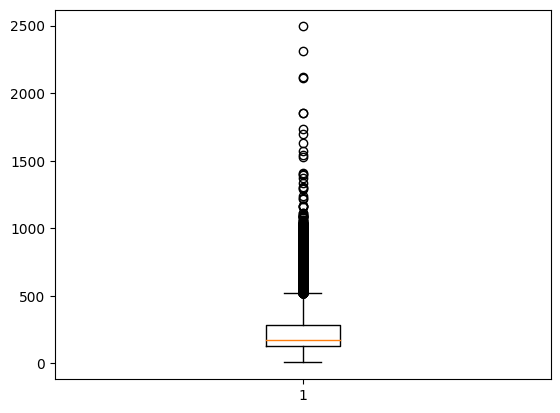

In [67]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [68]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

In [69]:
def vectorize_sequences(sequences, dimension=5000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [70]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [71]:
x_train.shape

(25000, 5000)

In [72]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [73]:
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [74]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [75]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

In [76]:
#Set validation set aside

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [77]:
x_val.shape

(10000, 5000)

In [78]:
y_val.shape

(10000,)

In [79]:
(partial_x_train.shape), (partial_y_train.shape)

((15000, 5000), (15000,))

In [80]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [81]:
start_time_m1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5655 - acc: 0.7563 - val_loss: 0.3959 - val_acc: 0.8504
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3001 - acc: 0.8896 - val_loss: 0.2945 - val_acc: 0.8819
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2139 - acc: 0.9200 - val_loss: 0.2887 - val_acc: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1682 - acc: 0.9396 - val_loss: 0.3021 - val_acc: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1369 - acc: 0.9535 - val_loss: 0.3222 - val_acc: 0.8762
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1099 - acc: 0.9645 - val_loss: 0.3509 - val_acc: 0.8724
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0865 - acc: 0.9748 - val_loss: 0.3851 - val_acc: 0.8686
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0675 - a

In [82]:
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

The Dense Convolutional Neural Network 1 layer took 21.6063 seconds to train.


In [83]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

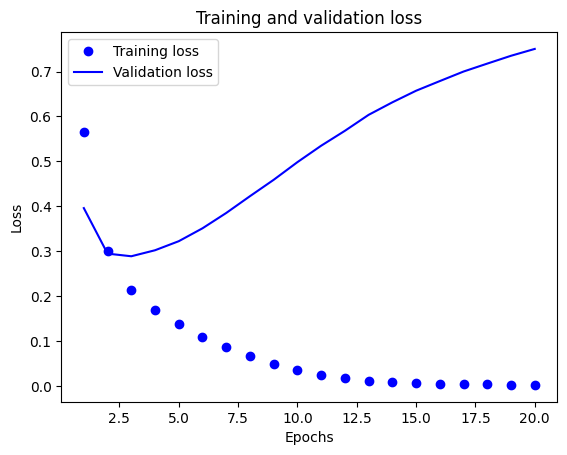

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

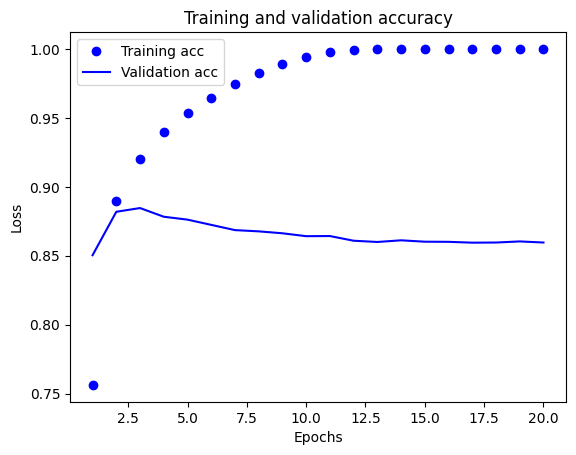

In [85]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                160032    
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161,121
Trainable params: 161,121
Non-trainable params: 0
_________________________________________________________________


In [87]:
evaluation = model.evaluate(x_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

782/782 [==============================] - 1s 2ms/step - loss: 0.7936 - acc: 0.8500
Test Accuracy : 0.850


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc
#predictions
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)

#accuracy
accuracy_score(y_test,classes_x)

782/782 [==============================] - 1s 2ms/step


0.5

[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

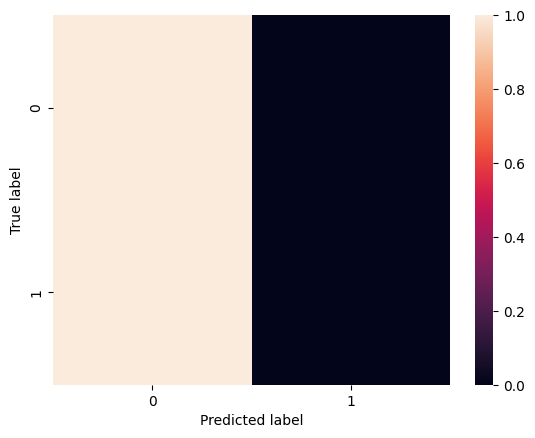

In [89]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [90]:
r=metrics.classification_report(y_test, classes_x)
print(r)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     12500
         1.0       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
